## The code is to analysis the train speed data of two different datasets

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [268]:
cur_dir = os.getcwd()
parent_dir = os.path.dirname(cur_dir)
data_dir = os.path.join(parent_dir, 'Data/alexnet/CombinedInfo')
data_dir

'/Users/dtjgp/Projects/GreenAI/PVWatts/Data/alexnet/CombinedInfo'

In [269]:
filepath_f = os.path.join(data_dir, 'TrainSpeed_f.csv')
filepath_c = os.path.join(data_dir, 'TrainSpeed_c.csv')

In [270]:
# Load data
TrainSpeed_f = pd.read_csv(filepath_f)
TrainSpeed_c = pd.read_csv(filepath_c)
print(TrainSpeed_f.head())
print('*'*50)
print(TrainSpeed_c.head())

             40            45            50            55            60  \
0  6.260767e+11  7.949616e+11  9.002390e+11  9.551770e+11  9.939142e+11   
1  6.207033e+11  7.941712e+11  9.037201e+11  9.591135e+11  9.975298e+11   
2  6.174983e+11  7.932371e+11  9.017055e+11  9.570855e+11  9.955317e+11   
3  6.124883e+11  7.895619e+11  8.995930e+11  9.573331e+11  9.940835e+11   
4  6.138065e+11  7.865831e+11  9.001703e+11  9.574863e+11  9.934367e+11   

             65            70            75            80            85  \
0  1.044713e+12  1.093338e+12  1.115470e+12  1.139037e+12  1.151578e+12   
1  1.048327e+12  1.095509e+12  1.121074e+12  1.129754e+12  1.154059e+12   
2  1.046313e+12  1.089642e+12  1.115481e+12  1.127663e+12  1.150827e+12   
3  1.043518e+12  1.084270e+12  1.111445e+12  1.128811e+12  1.149000e+12   
4  1.042629e+12  1.081235e+12  1.111173e+12  1.128578e+12  1.148349e+12   

             90            95  
0  1.172336e+12  1.182034e+12  
1  1.172974e+12  1.192859e+12  
2 

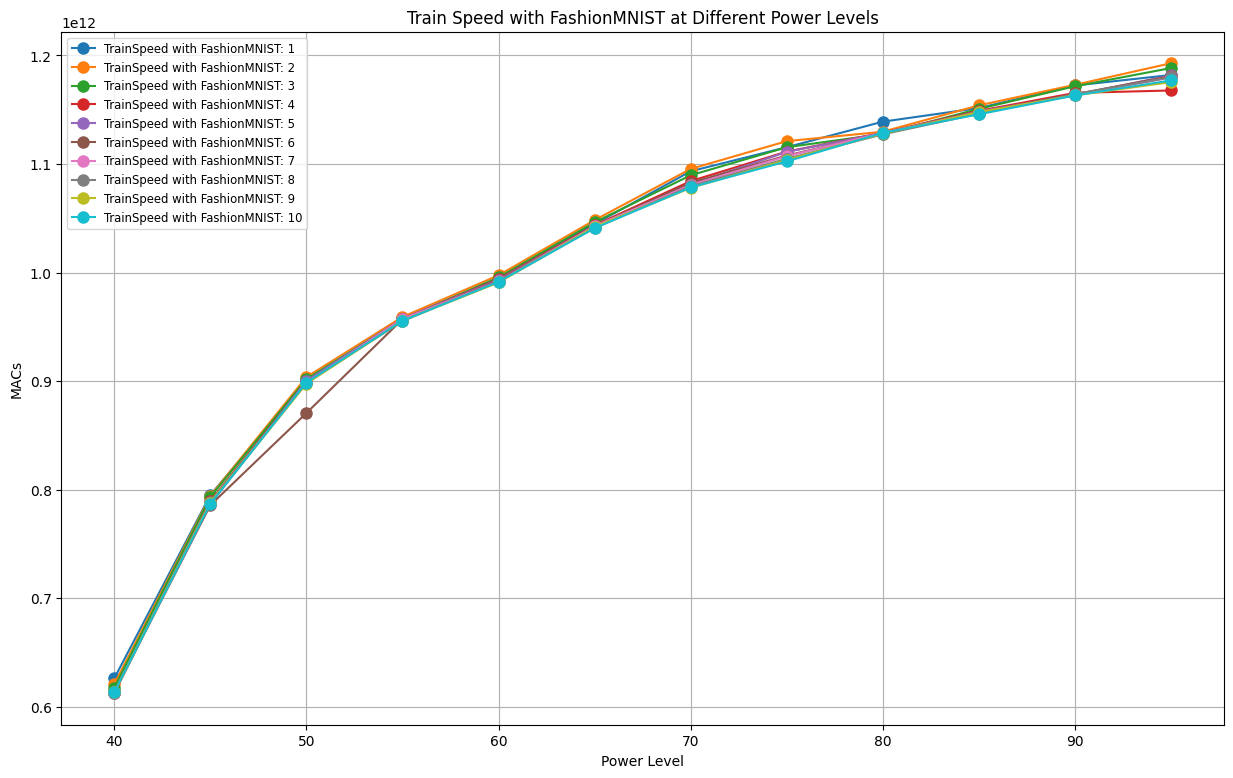

In [271]:
power_levels = [int(i) for i in TrainSpeed_f.columns.tolist()]

plt.figure(figsize=(15, 9))

# Plot TrainSpeed_f
for i in range(TrainSpeed_f.shape[0]):
    plt.plot(power_levels, TrainSpeed_f.iloc[i, :], 'o-', label=f'TrainSpeed with FashionMNIST: {i+1}', markersize=8)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Train Speed with FashionMNIST at Different Power Levels')
plt.legend(fontsize='small', loc='upper left')
plt.grid()
plt.show()

In [272]:
gbrData_f = TrainSpeed_f.copy()
gbrData_c = TrainSpeed_c.copy()

In [273]:
gbrData_f['image_channel_number'] = 1  # Assuming FashionMNIST has 1 channel
gbrData_c['image_channel_number'] = 3  # Assuming Cifar100 has 3 channels

# print(gbrData_f.head())
# print('*'*50)
# print(gbrData_c.head())

In [274]:
gbrData_f['num_training_data'] = [60000] * len(gbrData_f)  # Assuming FashionMNIST has 60000 training images
gbrData_c['num_training_data'] = [50000] * len(gbrData_c)  # Assuming Cifar100 has 50000 training images

print(gbrData_f.head())
print('*' * 50)
print(gbrData_c.head())

             40            45            50            55            60  \
0  6.260767e+11  7.949616e+11  9.002390e+11  9.551770e+11  9.939142e+11   
1  6.207033e+11  7.941712e+11  9.037201e+11  9.591135e+11  9.975298e+11   
2  6.174983e+11  7.932371e+11  9.017055e+11  9.570855e+11  9.955317e+11   
3  6.124883e+11  7.895619e+11  8.995930e+11  9.573331e+11  9.940835e+11   
4  6.138065e+11  7.865831e+11  9.001703e+11  9.574863e+11  9.934367e+11   

             65            70            75            80            85  \
0  1.044713e+12  1.093338e+12  1.115470e+12  1.139037e+12  1.151578e+12   
1  1.048327e+12  1.095509e+12  1.121074e+12  1.129754e+12  1.154059e+12   
2  1.046313e+12  1.089642e+12  1.115481e+12  1.127663e+12  1.150827e+12   
3  1.043518e+12  1.084270e+12  1.111445e+12  1.128811e+12  1.149000e+12   
4  1.042629e+12  1.081235e+12  1.111173e+12  1.128578e+12  1.148349e+12   

             90            95  image_channel_number  num_training_data  
0  1.172336e+12  1.182034

#### 采用对数公式拟合

In [275]:
# make a new dataframe for log_f
# the first column is the power level
# the second column is the image_channels
# the third column is the number of training data
# the fourth column is the MACs
# the dataframe is modified based on the gbrData_f

# for each column in gbData_f, 
# if the column is not, 'image_channel_number', 'num_training_data', the column value add to GBR_f 'MACs', 
# and in the GBR_f 'PowerLevel' column, add the corresponding power level which is the column name
# the log_f 'ImageChannel' column is the same as the 'image_channel_number' column in gbrData_f
# the log_f 'NumTrainingData' column is the same as the 'num_training_data' column in gbrData_f
log_f = pd.DataFrame()
log_f_temp = pd.DataFrame()
for column in gbrData_f.columns:
    if column != 'image_channel_number' and column != 'num_training_data':
        # print(f'The current column is: {column}')
        log_f_temp['PowerLevel'] = [column] * len(gbrData_f)
        log_f_temp['ImageChannel'] = gbrData_f['image_channel_number']
        log_f_temp['NumTrainingData'] = gbrData_f['num_training_data']
        log_f_temp['MACs'] = gbrData_f[column]
        log_f = pd.concat([log_f, log_f_temp], axis=0)
        log_f_temp = pd.DataFrame()

print(log_f)

   PowerLevel  ImageChannel  NumTrainingData          MACs
0          40             1            60000  6.260767e+11
1          40             1            60000  6.207033e+11
2          40             1            60000  6.174983e+11
3          40             1            60000  6.124883e+11
4          40             1            60000  6.138065e+11
..        ...           ...              ...           ...
5          95             1            60000  1.181032e+12
6          95             1            60000  1.179868e+12
7          95             1            60000  1.179764e+12
8          95             1            60000  1.175471e+12
9          95             1            60000  1.177023e+12

[120 rows x 4 columns]


Fitted Parameters: a=1.0, b=1.0, c=1.0, d=1.0


/var/folders/d9/50r202r14gbc_shcxg960xrh0000gn/T/ipykernel_30178/2537701943.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.float)
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


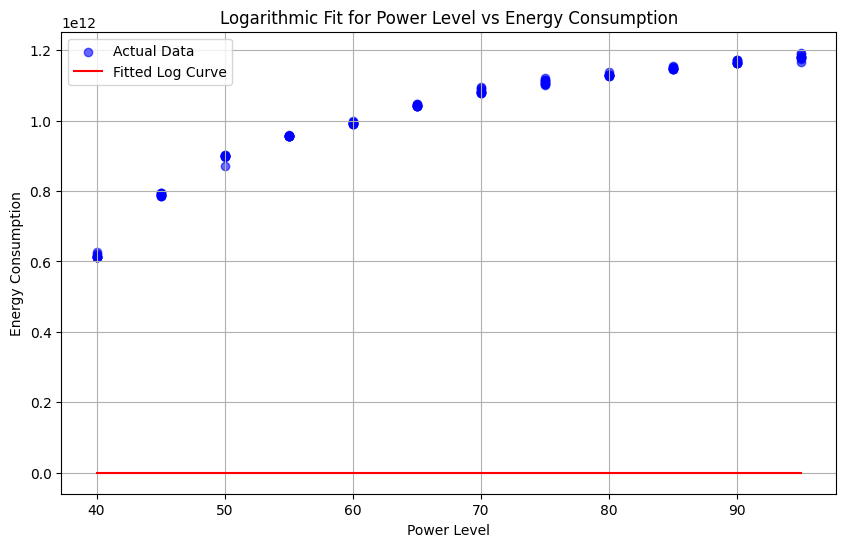

In [276]:
from scipy.optimize import curve_fit
import numpy as np

# 定义对数函数
def log_func(x, a, b, c, d):
    return a * np.log(b * x + c) + d

# 数据点 (X: PowerLevel, ImageChannel, NumTrainingData, Y: Energy Consumption)
X = log_f['PowerLevel'].values
X = np.array(X)
X = X.astype(np.float)
Y = log_f['MACs'].values

# 曲线拟合
params, _ = curve_fit(log_func, X, Y, p0=[1, 1, 1, 1])

# 打印拟合参数
print(f"Fitted Parameters: a={params[0]}, b={params[1]}, c={params[2]}, d={params[3]}")

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Actual Data', color='blue', alpha=0.6)
plt.plot(X, np.round(log_func(X, *params),2), label='Fitted Log Curve', color='red')
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('Logarithmic Fit for Power Level vs Energy Consumption')
plt.grid(True)
plt.show()

#### XGBoost

Mean Squared Error: 1.6264970369122163e+19
R^2 Score: 0.9993677085730931


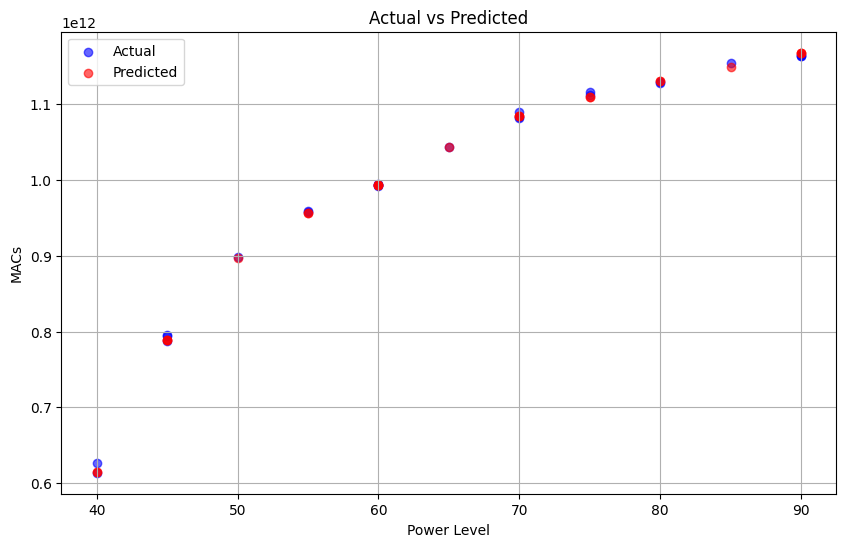

In [277]:
# 使用XGBoost回归模型
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# 特征和标签
X = log_f[['PowerLevel', 'ImageChannel', 'NumTrainingData']]
y = log_f['MACs']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert PowerLevel to numeric
X_train['PowerLevel'] = pd.to_numeric(X_train['PowerLevel'], errors='coerce')
X_test['PowerLevel'] = pd.to_numeric(X_test['PowerLevel'], errors='coerce')

# Check for NaN values after conversion and handle them if any
if X_train['PowerLevel'].isna().any() or X_test['PowerLevel'].isna().any():
    print("NaN values detected after conversion. Please handle them appropriately.")


# 训练模型
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, enable_categorical=True)
xgb.fit(X_train, y_train)

# 预测
y_pred = xgb.predict(X_test)

# 评估
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# plot the prediction value and the y_test, the x axis set to X
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PowerLevel'], y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X_test['PowerLevel'], y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

[array([6.1466116e+11], dtype=float32), array([6.1466116e+11], dtype=float32), array([6.1466116e+11], dtype=float32), array([6.1466116e+11], dtype=float32), array([6.1466116e+11], dtype=float32), array([7.88439e+11], dtype=float32), array([7.88439e+11], dtype=float32), array([7.88439e+11], dtype=float32), array([7.88439e+11], dtype=float32), array([7.88439e+11], dtype=float32), array([8.967466e+11], dtype=float32), array([8.967466e+11], dtype=float32), array([8.967466e+11], dtype=float32), array([8.967466e+11], dtype=float32), array([8.967466e+11], dtype=float32), array([9.5637524e+11], dtype=float32), array([9.5637524e+11], dtype=float32), array([9.5637524e+11], dtype=float32), array([9.5637524e+11], dtype=float32), array([9.5637524e+11], dtype=float32), array([9.935471e+11], dtype=float32), array([9.935471e+11], dtype=float32), array([9.935471e+11], dtype=float32), array([9.935471e+11], dtype=float32), array([9.935471e+11], dtype=float32), array([1.04361486e+12], dtype=float32), arra

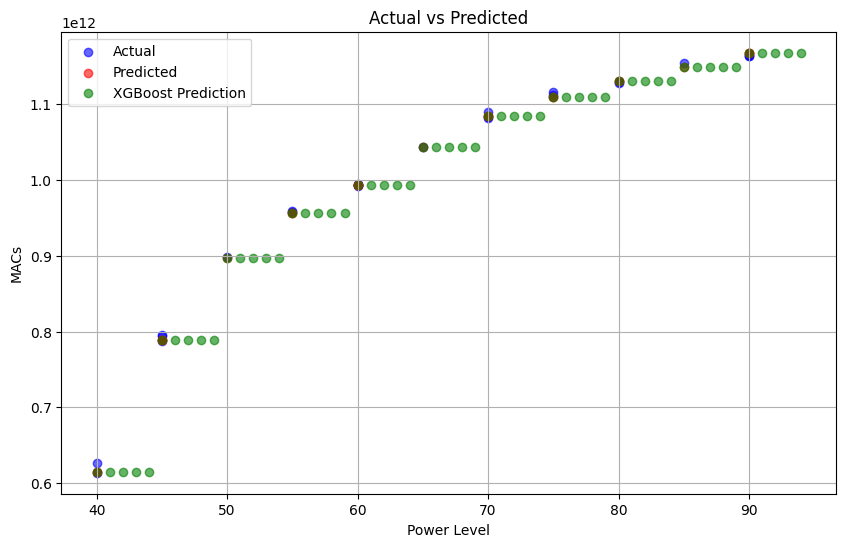

In [278]:
xgboost_f = []
for i in range(40, 95):
    xgboost_f.append(xgb.predict([[i, 1, 60000]]))

print(xgboost_f)

# plot the prediction value and the y_test, the x axis set to X
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PowerLevel'], y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X_test['PowerLevel'], y_pred, color='red', alpha=0.6, label='Predicted')
plt.scatter(range(40, 95), xgboost_f, color='green', alpha=0.6, label='XGBoost Prediction')
plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

#### 线性回归测试

Training MSE: 76593802672746725376.0000, R2: 0.9973
Testing MSE: 95725888872138752000.0000, R2: 0.9954
    PowerLevel  ImageChannel  NumTrainingData
44          80             1            60000
47          55             1            60000
4           50             1            60000
55          90             1            60000
26          65             1            60000
64          85             1            60000
73          95             1            60000
10          50             1            60000
40          45             1            60000
107         50             1            60000
18          65             1            60000
62          65             1            60000
11          65             1            60000
36          75             1            60000
89          90             1            60000
91          75             1            60000
109         45             1            60000
0           60             1            60000
88          80         

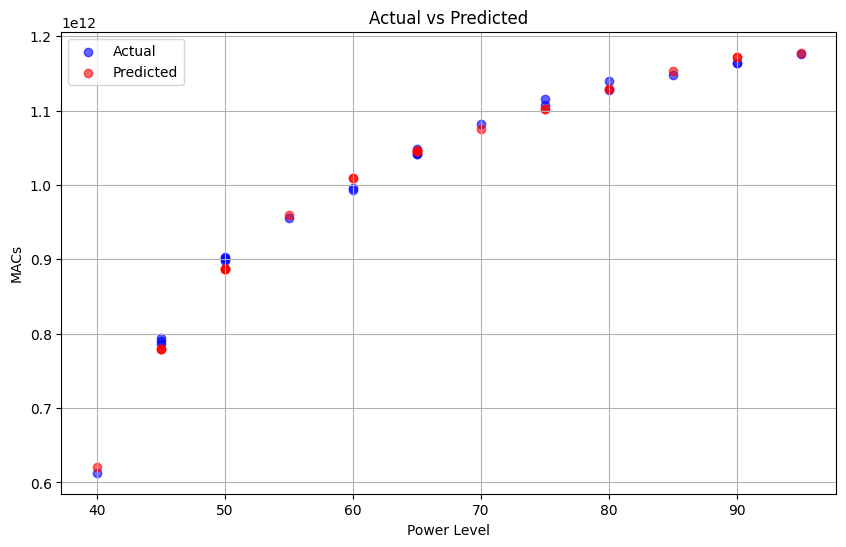

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# shuffle the data
log_f = log_f.sample(frac=1).reset_index(drop=True)

# 准备数据,X is the power level, ImageChannel, NumTrainingData , y is the energy consumption
X = log_f[['PowerLevel', 'ImageChannel', 'NumTrainingData']]
y = log_f['MACs']  # 目标变量：Energy_Consumption


# 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个包含多项式特征的线性回归模型
degree = 4  # 设置多项式的最高阶数
poly_lr_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# 训练模型
poly_lr_model.fit(X_train, y_train)

# 预测
y_pred_train = poly_lr_model.predict(X_train)
y_pred = poly_lr_model.predict(X_test)

# 计算模型的性能
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred)

print(f"Training MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# sort the X_test and y_pred based on the PowerLevel
# X_test = X_test.sort_values(by='PowerLevel')
print(X_test, X_test.dtypes)
print('*'*50)
print(y_pred, y_pred.dtype)
print('*'*50)
print(y_test, y_test.dtype)

X_test_label = X_test['PowerLevel'].values
X_test_label = [int(i) for i in X_test_label]
print(X_test_label)
print(y_pred)
y_test = y_test.to_numpy()
print(y_test)

# plot the prediction value and the y_test, the x axis set to different power levels
plt.figure(figsize=(10, 6))
plt.scatter(X_test_label, y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X_test_label, y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

[array([6.21091492e+11]), array([6.57476766e+11]), array([6.91312797e+11]), array([7.22744736e+11]), array([7.51913434e+11]), array([7.78955442e+11]), array([8.04003008e+11]), array([8.27184079e+11]), array([8.486223e+11]), array([8.68437015e+11]), array([8.86743266e+11]), array([9.03651794e+11]), array([9.19269037e+11]), array([9.33697135e+11]), array([9.47033922e+11]), array([9.59372934e+11]), array([9.70803403e+11]), array([9.81410262e+11]), array([9.91274141e+11]), array([1.00047137e+12]), array([1.00907397e+12]), array([1.01714967e+12]), array([1.0247619e+12]), array([1.03196977e+12]), array([1.03882811e+12]), array([1.04538744e+12]), array([1.05169398e+12]), array([1.05778964e+12]), array([1.06371203e+12]), array([1.06949447e+12]), array([1.07516598e+12]), array([1.08075126e+12]), array([1.08627072e+12]), array([1.09174047e+12]), array([1.09717232e+12]), array([1.10257376e+12]), array([1.10794801e+12]), array([1.11329395e+12]), array([1.11860621e+12]), array([1.12387506e+12]), ar

/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted w

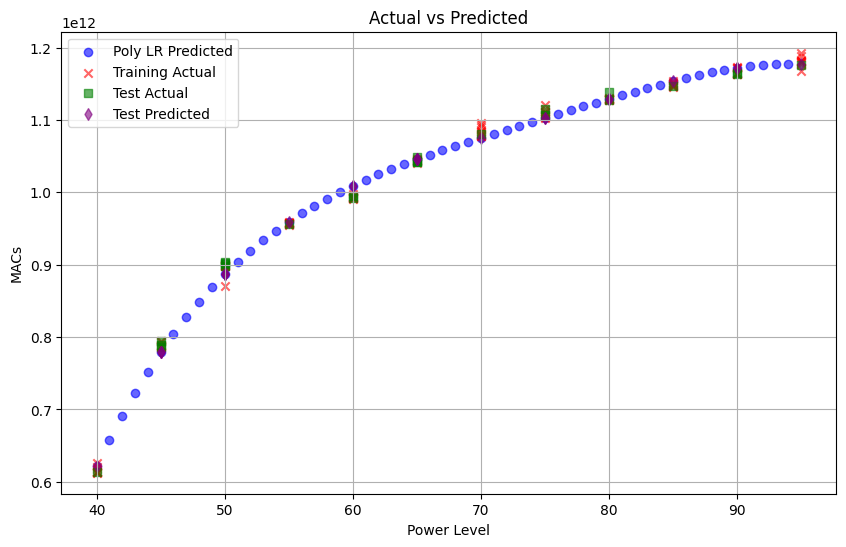

In [280]:
poly_lr_predict_data = []
for i in range(40, 95):
    poly_lr_predict_data.append(poly_lr_model.predict([[i, 1, 60000]]))
    # print(poly_lr_model.predict([[i, 1, 60000]]))

print(poly_lr_predict_data)
X_train_label = [int(i) for i in X_train['PowerLevel']]
print(X_train_label)


# plot the prediction value and the y_test, the x axis set to different power levels
plt.figure(figsize=(10, 6))
power_levels = range(40, 95)
plt.scatter(power_levels, poly_lr_predict_data, color='blue', alpha=0.6, label='Poly LR Predicted', marker='o')
plt.scatter(X_train_label, y_train, color='red', alpha=0.6, label='Training Actual', marker='x')
plt.scatter(X_test_label, y_test, color='green', alpha=0.6, label='Test Actual', marker='s')
plt.scatter(X_test_label, y_pred, color='purple', alpha=0.6, label='Test Predicted', marker='d')
plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [281]:
from joblib import dump

# Print the model's parameters
print(poly_lr_model.get_params())

# Save the model to a file
model_filename = 'MACs_predict_model.joblib'
dump(poly_lr_model, model_filename)

print(f'Model saved to {model_filename}')

{'memory': None, 'steps': [('poly_features', PolynomialFeatures(degree=4, include_bias=False)), ('linear_regression', LinearRegression())], 'verbose': False, 'poly_features': PolynomialFeatures(degree=4, include_bias=False), 'linear_regression': LinearRegression(), 'poly_features__degree': 4, 'poly_features__include_bias': False, 'poly_features__interaction_only': False, 'poly_features__order': 'C', 'linear_regression__copy_X': True, 'linear_regression__fit_intercept': True, 'linear_regression__n_jobs': None, 'linear_regression__positive': False}
Model saved to MACs_predict_model.joblib


#### 简单粗暴的 GBR

[20 19  8 16  2 21  7  9  1 23 17 12 11 10  4 22 13 15 18  0  5 14  3  6]
['40' '45' '45' '45' '50' '50' '50' '50' '55' '60' '60' '65' '65' '65'
 '65' '70' '75' '75' '80' '80' '85' '90' '90' '95']
[6.13063044e+11 7.89561929e+11 7.86583075e+11 7.94171226e+11
 9.00239026e+11 9.03720116e+11 8.98294668e+11 9.01705513e+11
 9.55729524e+11 9.92668817e+11 9.95531662e+11 1.04832749e+12
 1.04214101e+12 1.04119674e+12 1.04351791e+12 1.08123466e+12
 1.11547045e+12 1.10724753e+12 1.12766291e+12 1.13903677e+12
 1.14741254e+12 1.16348743e+12 1.16423071e+12 1.17547121e+12]
[6.15989693e+11 7.89400130e+11 7.89400130e+11 7.89400130e+11
 8.94166162e+11 8.94166162e+11 8.94166162e+11 8.94166162e+11
 9.56848308e+11 9.93078460e+11 9.93078460e+11 1.04335810e+12
 1.04335810e+12 1.04335810e+12 1.04335810e+12 1.08466855e+12
 1.10976420e+12 1.10976420e+12 1.12854921e+12 1.12854921e+12
 1.14897373e+12 1.16712089e+12 1.16712089e+12 1.18114872e+12]


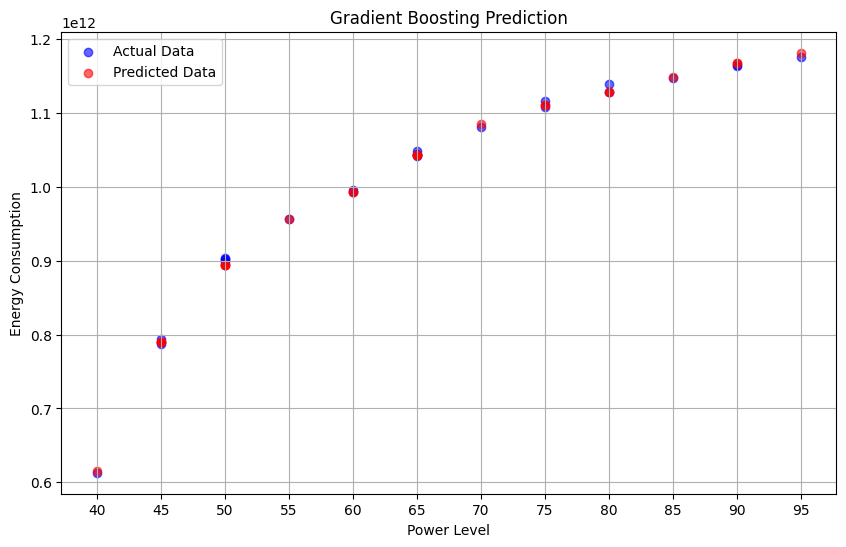

In [282]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 数据分割  
X = log_f[['PowerLevel']]
y = log_f['MACs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型初始化和训练
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# 测试预测
predictions = gbr.predict(X_test)

X_test_flat = X_test.values.squeeze() if hasattr(X_test, "values") else X_test.squeeze()
y_test_flat = y_test.values.squeeze() if hasattr(y_test, "values") else y_test.squeeze()
predictions = predictions.squeeze()

# sort the data
sorted_idx = X_test_flat.argsort()
print(sorted_idx)
X_test_flat = X_test_flat[sorted_idx]
print(X_test_flat)
y_test_flat = y_test_flat[sorted_idx]
print(y_test_flat)
predictions = predictions[sorted_idx]
print(predictions)


plt.figure(figsize=(10, 6))
plt.scatter(X_test_flat, y_test_flat, label='Actual Data', color='blue', alpha=0.6)
plt.scatter(X_test_flat, predictions, label='Predicted Data', color='red', alpha=0.6)
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('Gradient Boosting Prediction')
plt.grid(True)
plt.show()

/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Gra

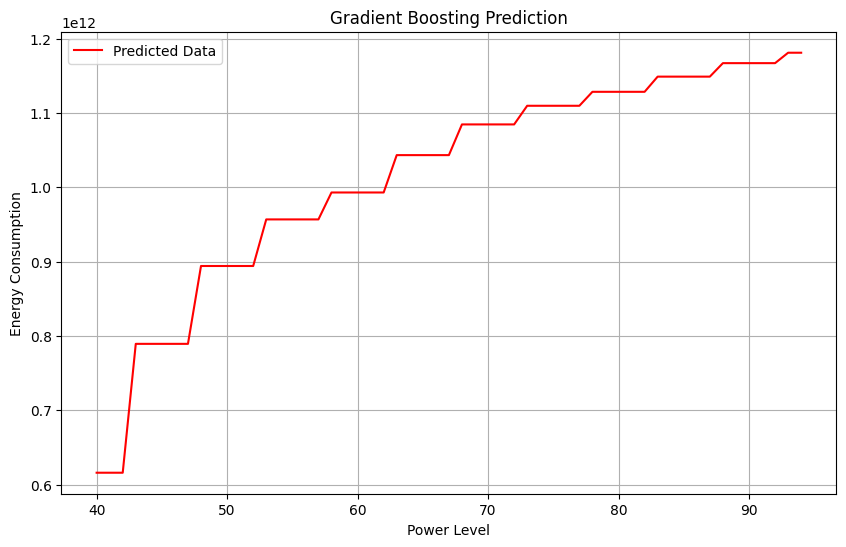

In [283]:
predict_value = []
# 评估模型
for i in range(40, 95):
    predicti = gbr.predict([[i]])
    predict_value.append(predicti[0])

plt.figure(figsize=(10, 6))
plt.plot(range(40, 95), predict_value, label='Predicted Data', color='red')
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('Gradient Boosting Prediction')
plt.grid(True)
plt.show()

#### SVR

/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib

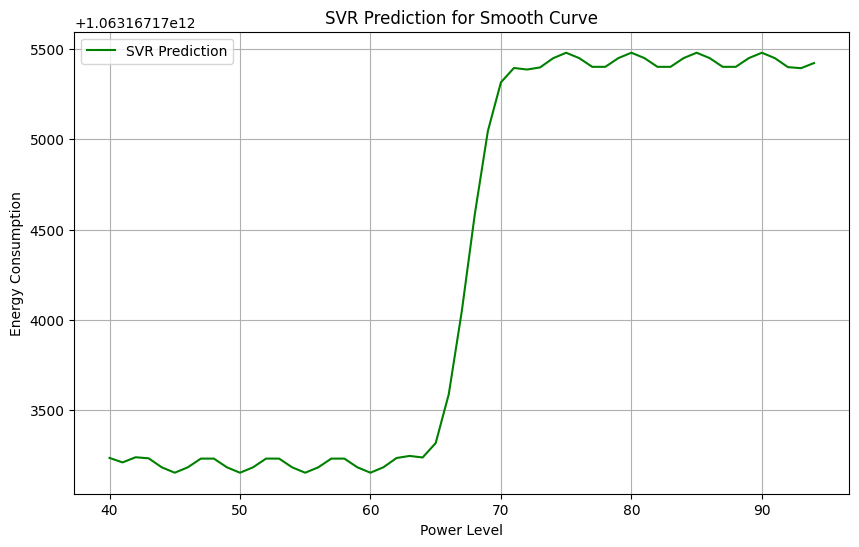

In [284]:
from sklearn.svm import SVR

X = log_f[['PowerLevel']]
y = log_f['MACs']

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X, y)

# 预测
predict_value = [svr_model.predict([[i]])[0] for i in range(40, 95)]

# 绘制
plt.figure(figsize=(10, 6))
plt.plot(range(40, 95), predict_value, label='SVR Prediction', color='green')
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('SVR Prediction for Smooth Curve')
plt.grid(True)
plt.show()

#### 增加了对数拟合的特征

/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Gra

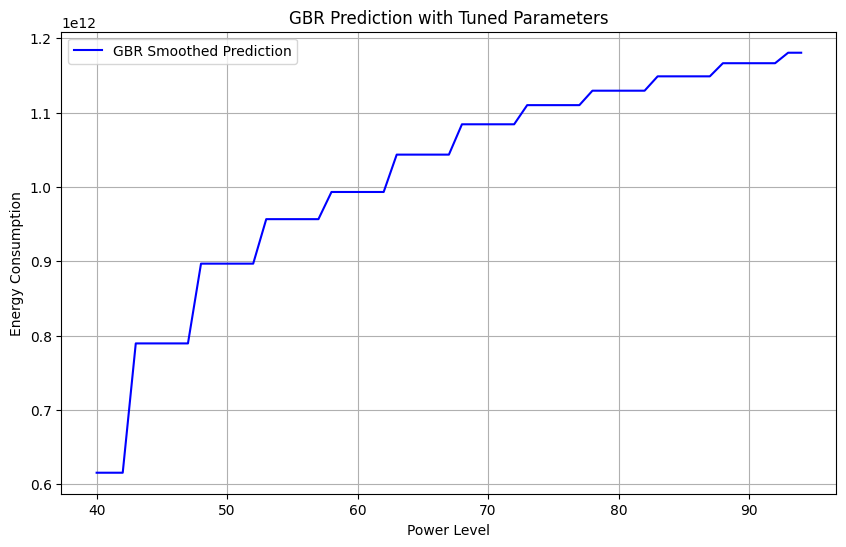

In [285]:
gbr_model = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=10,
    random_state=1
)
gbr_model.fit(X, y)

predict_value = [gbr_model.predict([[i]])[0] for i in range(40, 95)]

# 绘制平滑曲线
plt.figure(figsize=(10, 6))
plt.plot(range(40, 95), predict_value, label='GBR Smoothed Prediction', color='blue')
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('GBR Prediction with Tuned Parameters')
plt.grid(True)
plt.show()

#### 使线条更加平滑

/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/Users/dtjgp/miniconda3/envs/greenai/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Gra

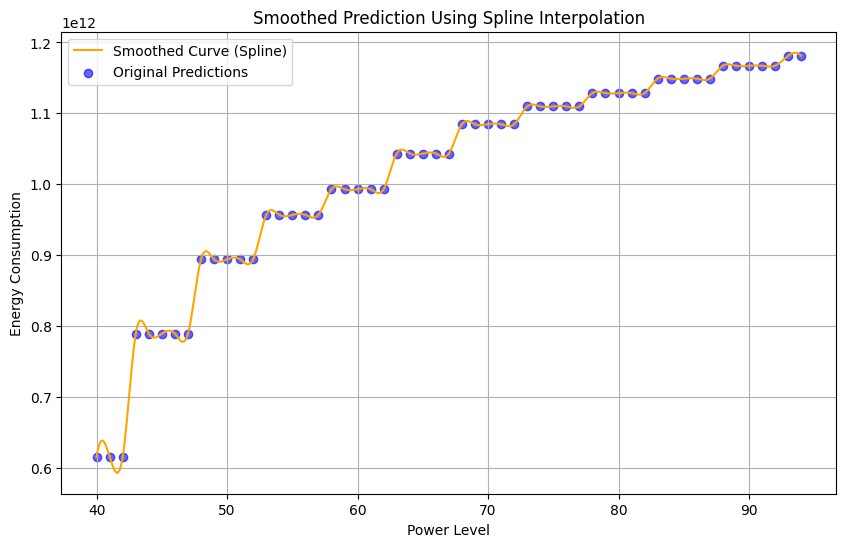

In [286]:
from scipy.interpolate import make_interp_spline
import numpy as np

# 原始预测结果
power_levels = range(40, 95)
predict_values = [gbr.predict([[i]])[0] for i in power_levels]

# 创建平滑插值
power_levels_smooth = np.linspace(40, 94, 5000)  # 平滑到500点
spline = make_interp_spline(power_levels, predict_values)
predict_smooth = spline(power_levels_smooth)

# 绘制平滑曲线
plt.figure(figsize=(10, 6))
plt.plot(power_levels_smooth, predict_smooth, label='Smoothed Curve (Spline)', color='orange')
plt.scatter(power_levels, predict_values, label='Original Predictions', color='blue', alpha=0.6)
plt.xlabel('Power Level')
plt.ylabel('Energy Consumption')
plt.legend()
plt.title('Smoothed Prediction Using Spline Interpolation')
plt.grid(True)
plt.show()

#### 采用 GBR 模型进行训练

In [287]:
# make a new dataframe for GBR_f
# the first column is the power level
# the second column is the image_channels
# the third column is the number of training data
# the fourth column is the MACs
# the dataframe is modified based on the gbrData_f

# for each column in gbData_f, 
# if the column is not, 'image_channel_number', 'num_training_data', the column value add to GBR_f 'MACs', 
# and in the GBR_f 'PowerLevel' column, add the corresponding power level which is the column name
# the GBR_f 'ImageChannel' column is the same as the 'image_channel_number' column in gbrData_f
# the GBR_f 'NumTrainingData' column is the same as the 'num_training_data' column in gbrData_f
gbr_f_train = pd.DataFrame()
gbr_f_test = pd.DataFrame()
gbr_f_temp = pd.DataFrame()
gbr_f_temp_train = pd.DataFrame()
gbr_f_temp_test = pd.DataFrame()
for column in gbrData_f.columns:
    if column != 'image_channel_number' and column != 'num_training_data':
        # print(f'The current column is: {column}')
        gbr_f_temp['PowerLevel'] = [column] * len(gbrData_f)
        gbr_f_temp['ImageChannel'] = gbrData_f['image_channel_number']
        gbr_f_temp['NumTrainingData'] = gbrData_f['num_training_data']
        gbr_f_temp['MACs'] = gbrData_f[column]
        # randomly split the data into training and testing
        gbr_f_temp_train = gbr_f_temp.sample(frac=0.8)
        gbr_f_temp_test = gbr_f_temp.drop(gbr_f_temp_train.index)
        gbr_f_train = pd.concat([gbr_f_train, gbr_f_temp_train])
        gbr_f_test = pd.concat([gbr_f_test, gbr_f_temp_test])
        gbr_f_temp = pd.DataFrame()
        gbr_f_temp_train = pd.DataFrame()
        gbr_f_temp_test = pd.DataFrame()

print(gbr_f_train)
print('*'*50)
print(gbr_f_test)


   PowerLevel  ImageChannel  NumTrainingData          MACs
0          40             1            60000  6.260767e+11
5          40             1            60000  6.136129e+11
1          40             1            60000  6.207033e+11
9          40             1            60000  6.133451e+11
6          40             1            60000  6.129985e+11
..        ...           ...              ...           ...
5          95             1            60000  1.181032e+12
6          95             1            60000  1.179868e+12
1          95             1            60000  1.192859e+12
3          95             1            60000  1.167759e+12
2          95             1            60000  1.188433e+12

[96 rows x 4 columns]
**************************************************
  PowerLevel  ImageChannel  NumTrainingData          MACs
3         40             1            60000  6.124883e+11
7         40             1            60000  6.130630e+11
4         45             1            60000 

In [288]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

# Define the features and target
X_train = gbr_f_train[['PowerLevel', 'ImageChannel', 'NumTrainingData']]
y_train = gbr_f_train['MACs']

X_test = gbr_f_test[['PowerLevel', 'ImageChannel', 'NumTrainingData']]
y_test = gbr_f_test['MACs']

# Convert PowerLevel to numeric
X_train['PowerLevel'] = X_train['PowerLevel'].astype(int)
X_test['PowerLevel'] = X_test['PowerLevel'].astype(int)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# Initialize the model
gbr = GradientBoostingRegressor()

# Perform cross-validation on the training data
cv_scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Train the model on the entire training data
gbr.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate the mean squared error for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate the accuracy
train_accuracy = gbr.score(X_train, y_train)
test_accuracy = gbr.score(X_test, y_test)

# Print the results
print(f'Cross-Validation Mean Squared Error: {-cv_scores.mean()}')
print(f'Training Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

/var/folders/d9/50r202r14gbc_shcxg960xrh0000gn/T/ipykernel_30178/2352374215.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['PowerLevel'] = X_train['PowerLevel'].astype(int)
/var/folders/d9/50r202r14gbc_shcxg960xrh0000gn/T/ipykernel_30178/2352374215.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['PowerLevel'] = X_test['PowerLevel'].astype(int)


Cross-Validation Mean Squared Error: 3.284582867783032e+19
Training Mean Squared Error: 2.357271073309661e+19
Test Mean Squared Error: 1.5040060635173683e+19
Training Accuracy: 0.9991260272199816
Test Accuracy: 0.9994454888789959


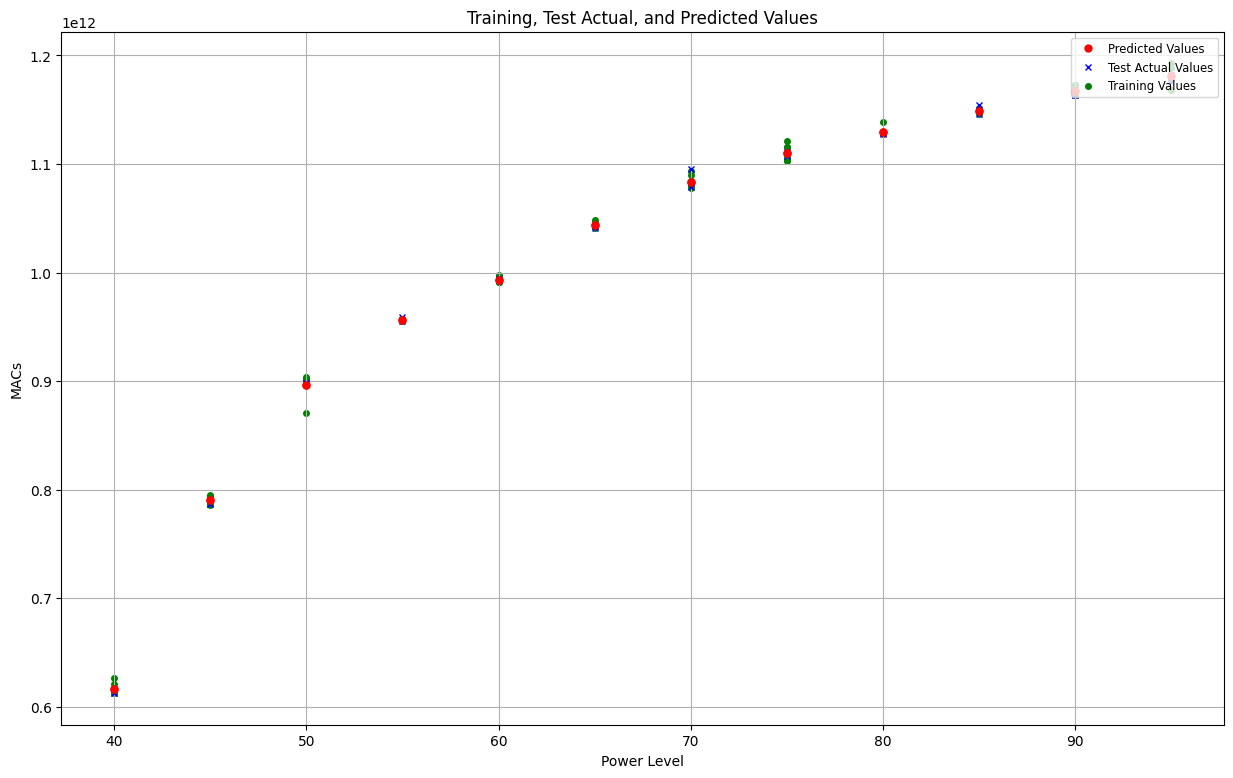

In [289]:
plt.figure(figsize=(15, 9))

# Plot predicted values
plt.plot(X_test['PowerLevel'], y_test_pred, 'o', label='Predicted Values', markersize=5, color='red', zorder=3)

# Plot test actual values
plt.plot(X_test['PowerLevel'], y_test.values, 'x', label='Test Actual Values', markersize=5, color='blue', zorder=2)

# Plot training values
plt.plot(X_train['PowerLevel'], y_train.values, 'o', label='Training Values', markersize=4, color='green', zorder=1)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Training, Test Actual, and Predicted Values')
plt.legend(fontsize='small', loc='upper right')
plt.grid()
plt.show()

In [290]:
from joblib import dump

# Save the model to a file
model_filename = 'gradient_boosting_regressor_model.joblib'
dump(gbr, model_filename)

print(f'Model saved to {model_filename}')

Model saved to gradient_boosting_regressor_model.joblib


Model loaded from gradient_boosting_regressor_model.joblib
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Predicted MACs for PowerLevel=88W, ImageChannel=1, NumTrainingData=60000: 1167222895759.6233
Predicted MACs for PowerLevel=43W, ImageChannel=1, NumTrainingData=60000: 616425953176.2963


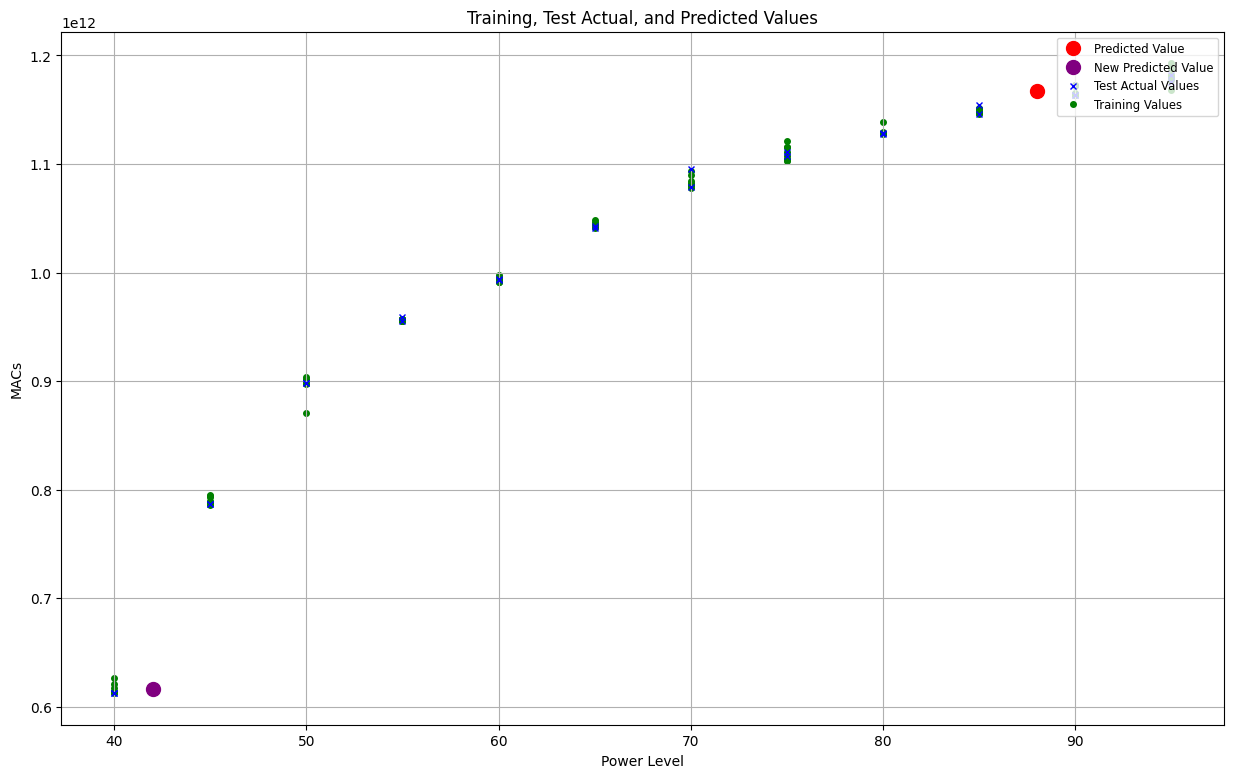

In [291]:
from joblib import load

# Load the model from the file
loaded_model = load(model_filename)

print(f'Model loaded from {model_filename}')

# Print the loaded model's parameters
print(loaded_model.get_params())

# Define the input parameters
input_data = pd.DataFrame({
    'PowerLevel': [88],
    'ImageChannel': [1],
    'NumTrainingData': [60000]
})

# Predict the MACs using the loaded model
predicted_MACs = loaded_model.predict(input_data)

print(f'Predicted MACs for PowerLevel=88W, ImageChannel=1, NumTrainingData=60000: {predicted_MACs[0]}')

# Define the new input parameters
new_input_data = pd.DataFrame({
    'PowerLevel': [42],
    'ImageChannel': [1],
    'NumTrainingData': [60000]
})

# Predict the MACs using the loaded model
new_predicted_MACs = loaded_model.predict(new_input_data)

print(f'Predicted MACs for PowerLevel=43W, ImageChannel=1, NumTrainingData=60000: {new_predicted_MACs[0]}')

plt.figure(figsize=(15, 9))

# Plot predicted values
plt.plot(input_data['PowerLevel'], predicted_MACs, 'o', label='Predicted Value', markersize=10, color='red', zorder=3)

# Plot new predicted values
plt.plot(new_input_data['PowerLevel'], new_predicted_MACs, 'o', label='New Predicted Value', markersize=10, color='purple', zorder=3)

# Plot test actual values
plt.plot(X_test['PowerLevel'], y_test.values, 'x', label='Test Actual Values', markersize=5, color='blue', zorder=2)

# Plot training values
plt.plot(X_train['PowerLevel'], y_train.values, 'o', label='Training Values', markersize=4, color='green', zorder=1)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Training, Test Actual, and Predicted Values')
plt.legend(fontsize='small', loc='upper right')
plt.grid()
plt.show()

[616425953176.2963, 616425953176.2963, 616425953176.2963, 790313633697.749, 790313633697.749, 790313633697.749, 790313633697.749, 790313633697.749, 896544679492.7966, 896544679492.7966, 896544679492.7966, 896544679492.7966, 896544679492.7966, 956633746533.8124, 956633746533.8124, 956633746533.8124, 956633746533.8124, 956633746533.8124, 993163325570.4023, 993163325570.4023, 993163325570.4023, 993163325570.4023, 993163325570.4023, 1043938238224.6505, 1043938238224.6505, 1043938238224.6505, 1043938238224.6505, 1043938238224.6505, 1083661680893.3285, 1083661680893.3285, 1083661680893.3285, 1083661680893.3285, 1083661680893.3285, 1110267587901.616, 1110267587901.616, 1110267587901.616, 1110267587901.616, 1110267587901.616, 1129913632010.7268, 1129913632010.7268, 1129913632010.7268, 1129913632010.7268, 1129913632010.7268, 1148541537879.1086, 1148541537879.1086, 1148541537879.1086, 1148541537879.1086, 1148541537879.1086, 1167222895759.6233, 1167222895759.6233, 1167222895759.6233, 116722289575

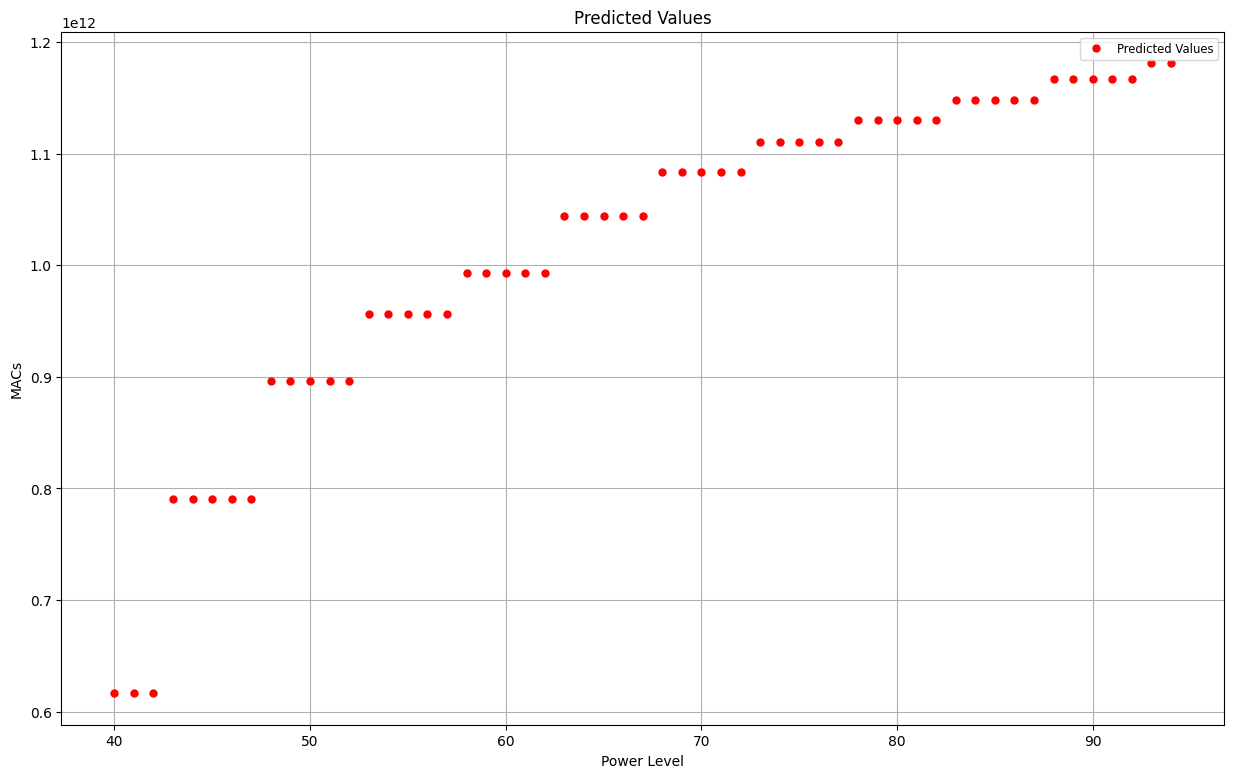

In [292]:
predict_values = []
for i in range(40,95):
    new_input_data = pd.DataFrame({
    'PowerLevel': [i],
    'ImageChannel': [1],
    'NumTrainingData': [60000]
})
    new_predicted_MACs = loaded_model.predict(new_input_data)
    predict_values.append(new_predicted_MACs[0])

print(predict_values)

# plot the predicted values
plt.figure(figsize=(15, 9))
plt.plot(range(40, 95), predict_values, 'o', label='Predicted Values', markersize=5, color='red', zorder=3)
plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Predicted Values')
plt.legend(fontsize='small', loc='upper right')
plt.grid()
plt.show()

## 对两个数据进行显示和分析

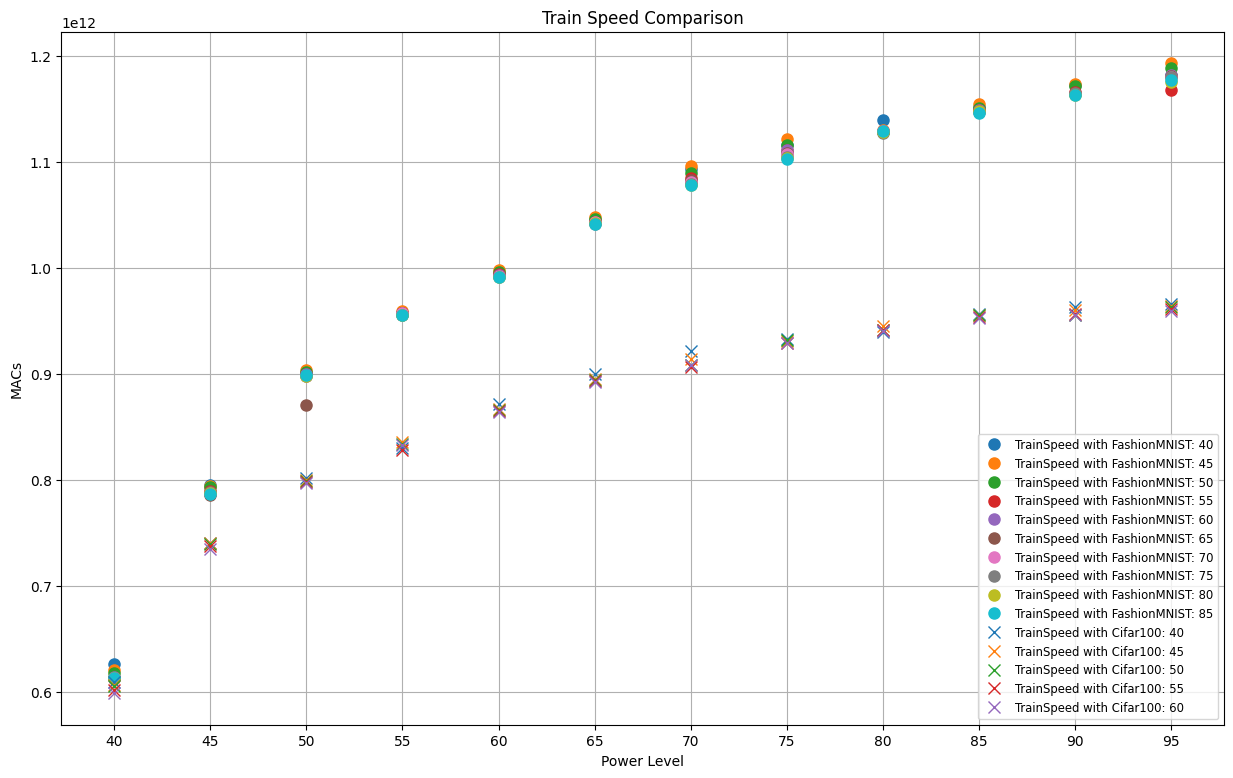

In [293]:
power_levels = [int(i) for i in TrainSpeed_f.columns.tolist()]

plt.figure(figsize=(15, 9))

# Plot TrainSpeed_f
for i in range(TrainSpeed_f.shape[0]):
    plt.plot(TrainSpeed_f.iloc[i, :], 'o', label='TrainSpeed with FashionMNIST: {}'.format(power_levels[i]), markersize=8)

# Plot TrainSpeed_c
for i in range(TrainSpeed_c.shape[0]):
    plt.plot(TrainSpeed_c.iloc[i, :], 'x', label='TrainSpeed with Cifar100: {}'.format(power_levels[i]), markersize=8)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Train Speed Comparison')
plt.legend(fontsize='small', loc='lower right')
plt.grid()
plt.show()

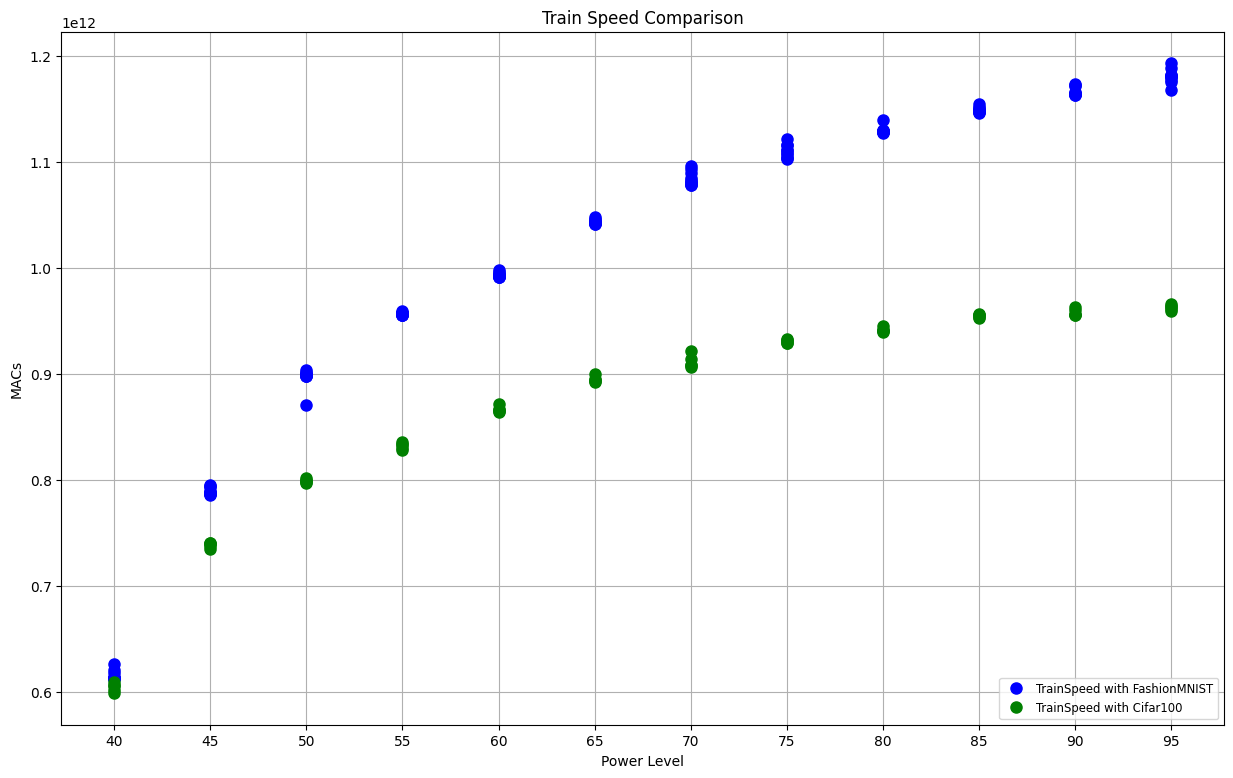

In [294]:
colors = ['blue', 'green']

plt.figure(figsize=(15, 9))

# Plot TrainSpeed_f
for i in range(TrainSpeed_f.shape[0]):
    plt.plot(TrainSpeed_f.iloc[i, :], 'o', color=colors[0], label='TrainSpeed with FashionMNIST' if i == 0 else "", markersize=8)

# Plot TrainSpeed_c
for i in range(TrainSpeed_c.shape[0]):
    plt.plot(TrainSpeed_c.iloc[i, :], 'o', color=colors[1], label='TrainSpeed with Cifar100' if i == 0 else "", markersize=8)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Train Speed Comparison')
plt.legend(fontsize='small', loc='lower right')
plt.grid()
plt.show()

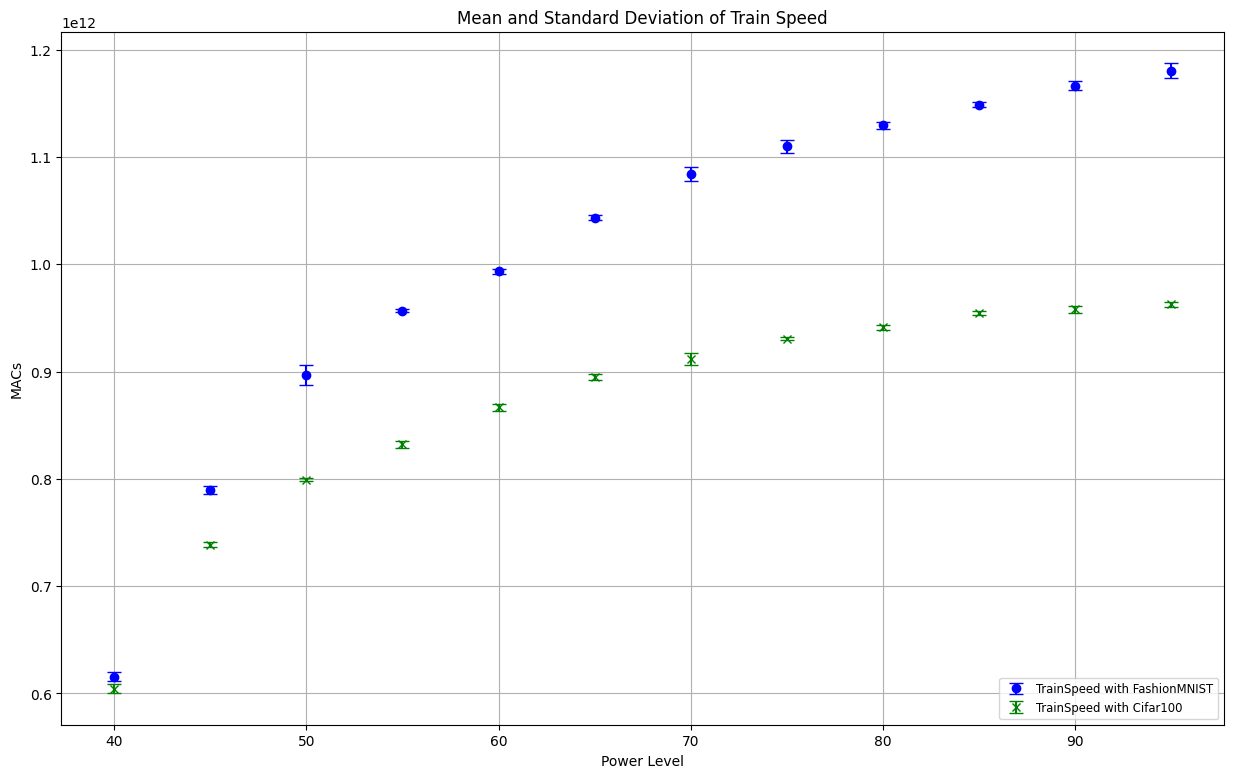

In [295]:
# Calculate mean and standard deviation
mean_f = TrainSpeed_f.mean(axis=0)
std_f = TrainSpeed_f.std(axis=0)
mean_c = TrainSpeed_c.mean(axis=0)
std_c = TrainSpeed_c.std(axis=0)

plt.figure(figsize=(15, 9))

# Plot mean and std for TrainSpeed_f
plt.errorbar(power_levels, mean_f, yerr=std_f, fmt='o', color='blue', label='TrainSpeed with FashionMNIST', capsize=5)

# Plot mean and std for TrainSpeed_c
plt.errorbar(power_levels, mean_c, yerr=std_c, fmt='x', color='green', label='TrainSpeed with Cifar100', capsize=5)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Mean and Standard Deviation of Train Speed')
plt.legend(fontsize='small', loc='lower right')
plt.grid()
plt.show()


In [296]:
# print(mean_f)
# print(std_f)
# print(mean_c)
# print(std_c)

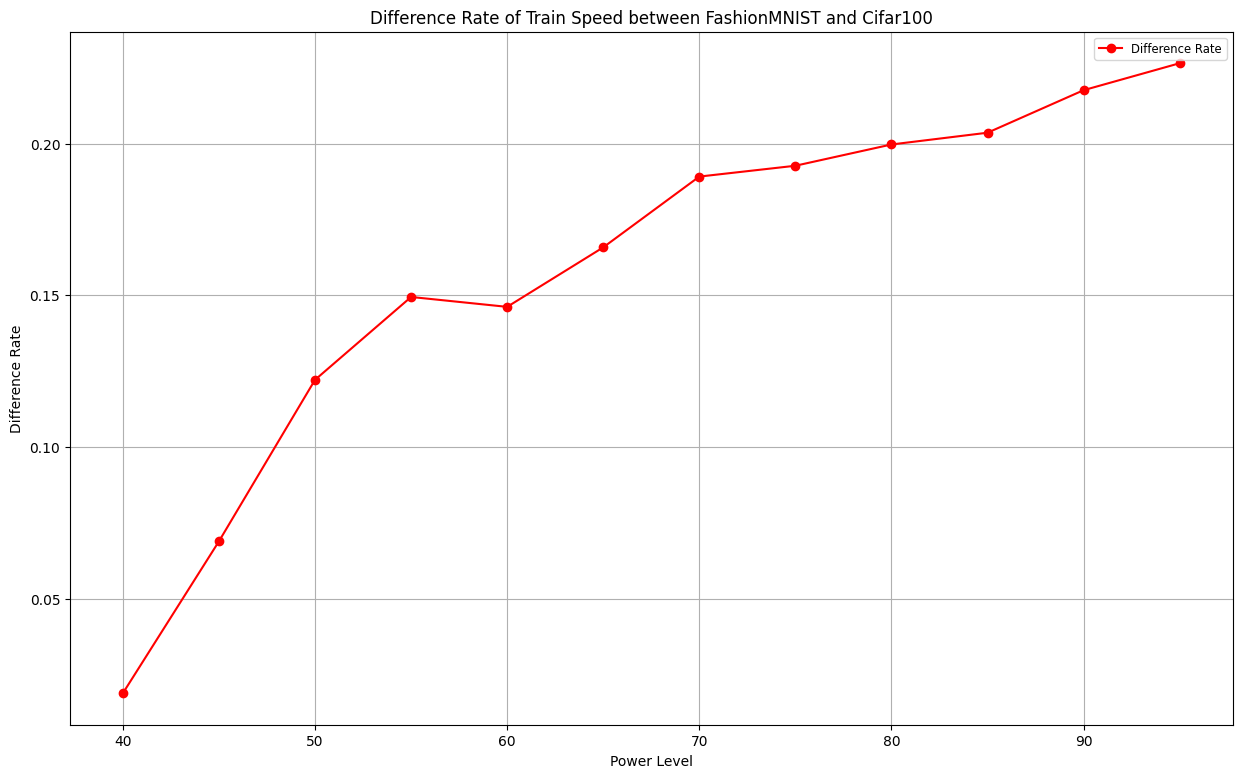

In [297]:
# Calculate the difference rate
difference_rate = (mean_f - mean_c) / mean_c
plt.figure(figsize=(15, 9))

plt.plot(power_levels, difference_rate, 'o-', color='red', label='Difference Rate')

plt.xlabel('Power Level')
plt.ylabel('Difference Rate')
plt.title('Difference Rate of Train Speed between FashionMNIST and Cifar100')
plt.legend(fontsize='small', loc='upper right')
plt.grid()
plt.show()